In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict,cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import KFold
import shap
import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Q1 - Paris Housing dataset is used for this task instead of Melbourne Housing data.
df = pd.read_csv("ParisHousing.csv")
df.head()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
df.shape

(10000, 17)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [5]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
#Q2a Convert categorical data using one-hot encoding
df.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

- Since there is no categorical data present in the dataset no encoding is required.
- There exists binary data in the dataset for hasYard,hasPool, isNewBuilt, hasStormProtector, hasStorageRoom.

In [8]:
#Q2b Create new features

df['PropertyAge']=2025-df['made'] # Age of the property in years. 

df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,PropertyAge
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,20
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,10
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,4
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,13
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,35


#### Q2c Normalizing or Standardizing data
No Normalization or Standardization is required for this dataset.
- The ParisHousing dataset is synthetic.
- Features are already in reasonable numeric ranges: squareMeters - around 2000–10000, numberOfRooms - around 1–10, hasYard, hasPool, garage - binary 0/1, cityCode, cityPartRange - moderate ranges (1000–10000 and 1–10)
- Actual price values has to be predicted. Scaling the dataset leads to mismatched magnitude for correct predictions.
- We can see in the dataset that there is a linear relationship between squaremeters, numberOfRooms and cityPartRange with the price.

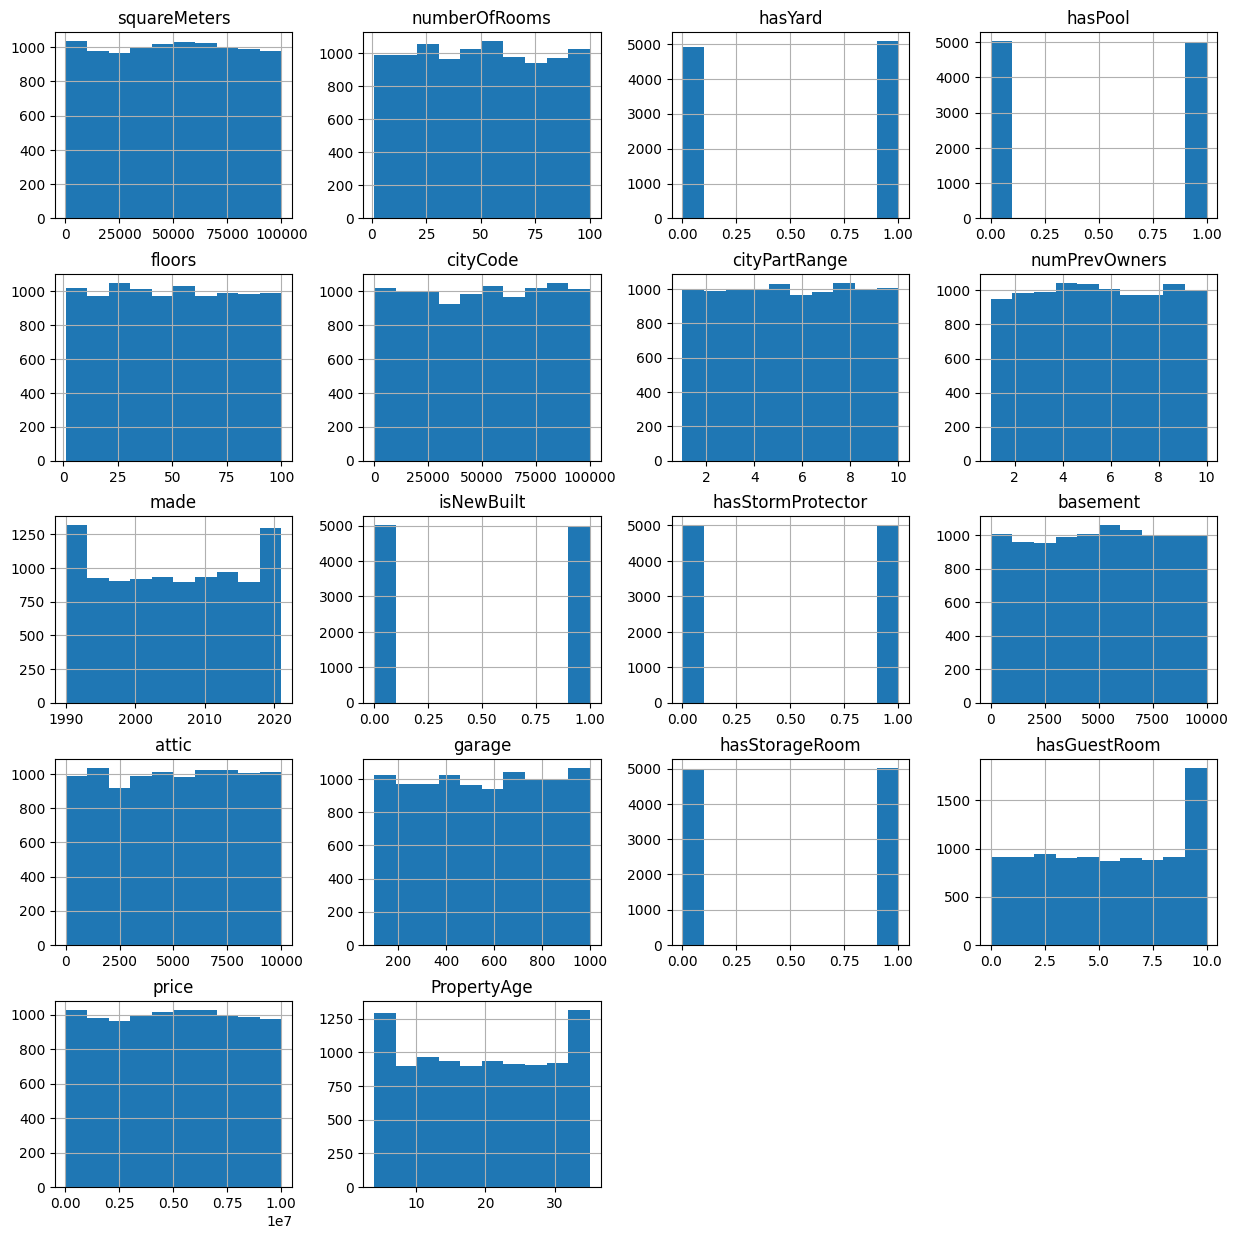

In [9]:
#Q2d Visulaization of Housing price distributions, feature to target correlations and outliers.

df.hist(figsize=(15,15))
plt.show()

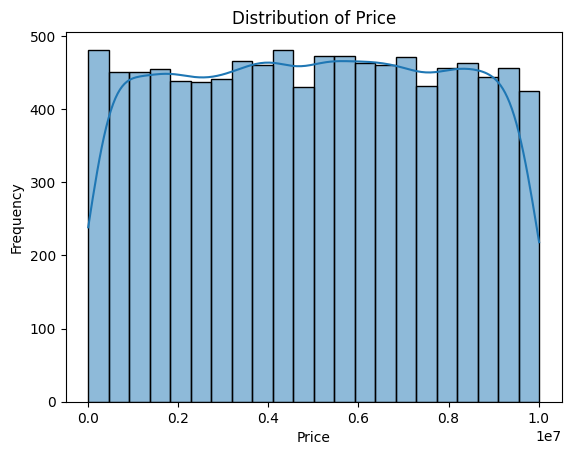

In [10]:
# Housing price distributions

sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

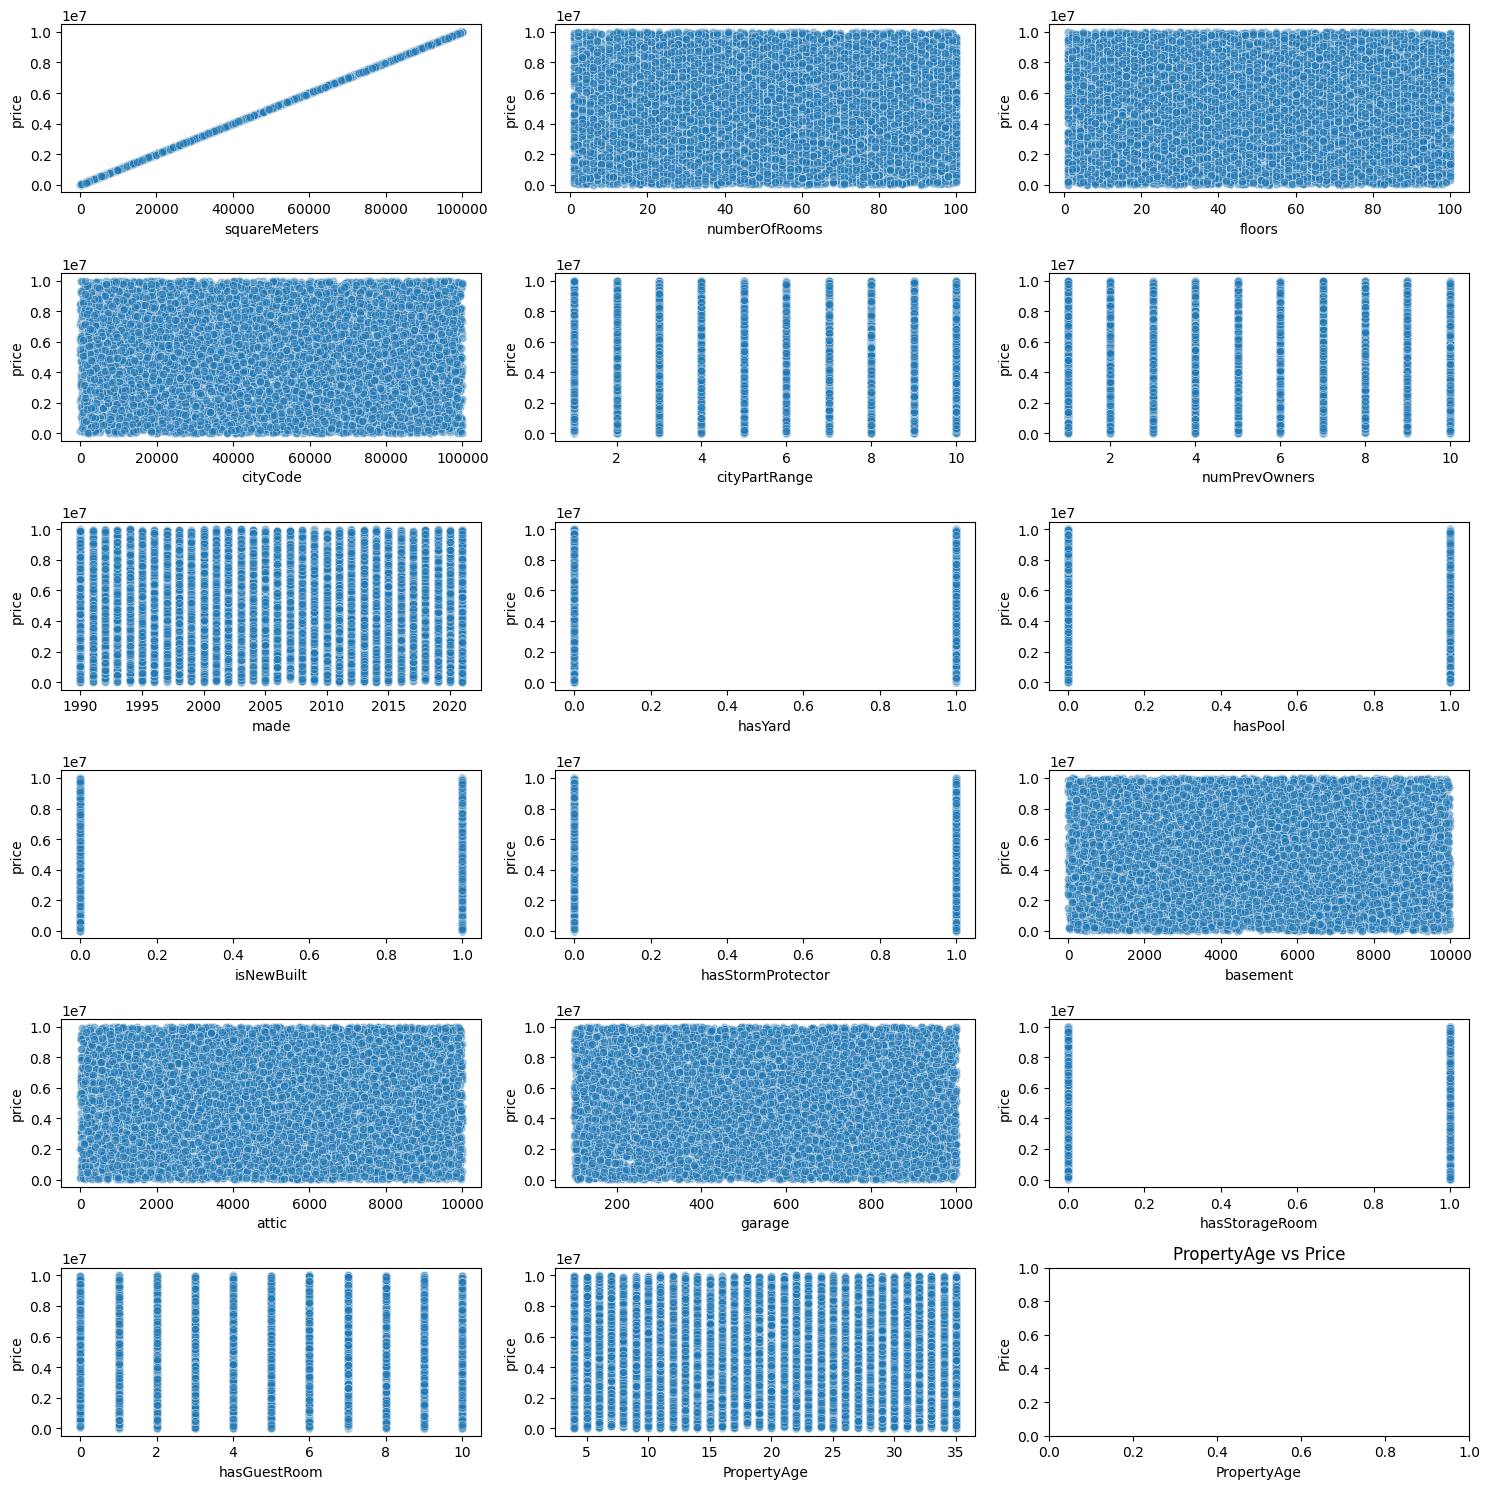

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
axes = axes.flatten() 

# Scatterplots
continuous_features = ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made','hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector','basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'PropertyAge']

for i, feature in enumerate(continuous_features):
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.5, ax=axes[i])
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.tight_layout()


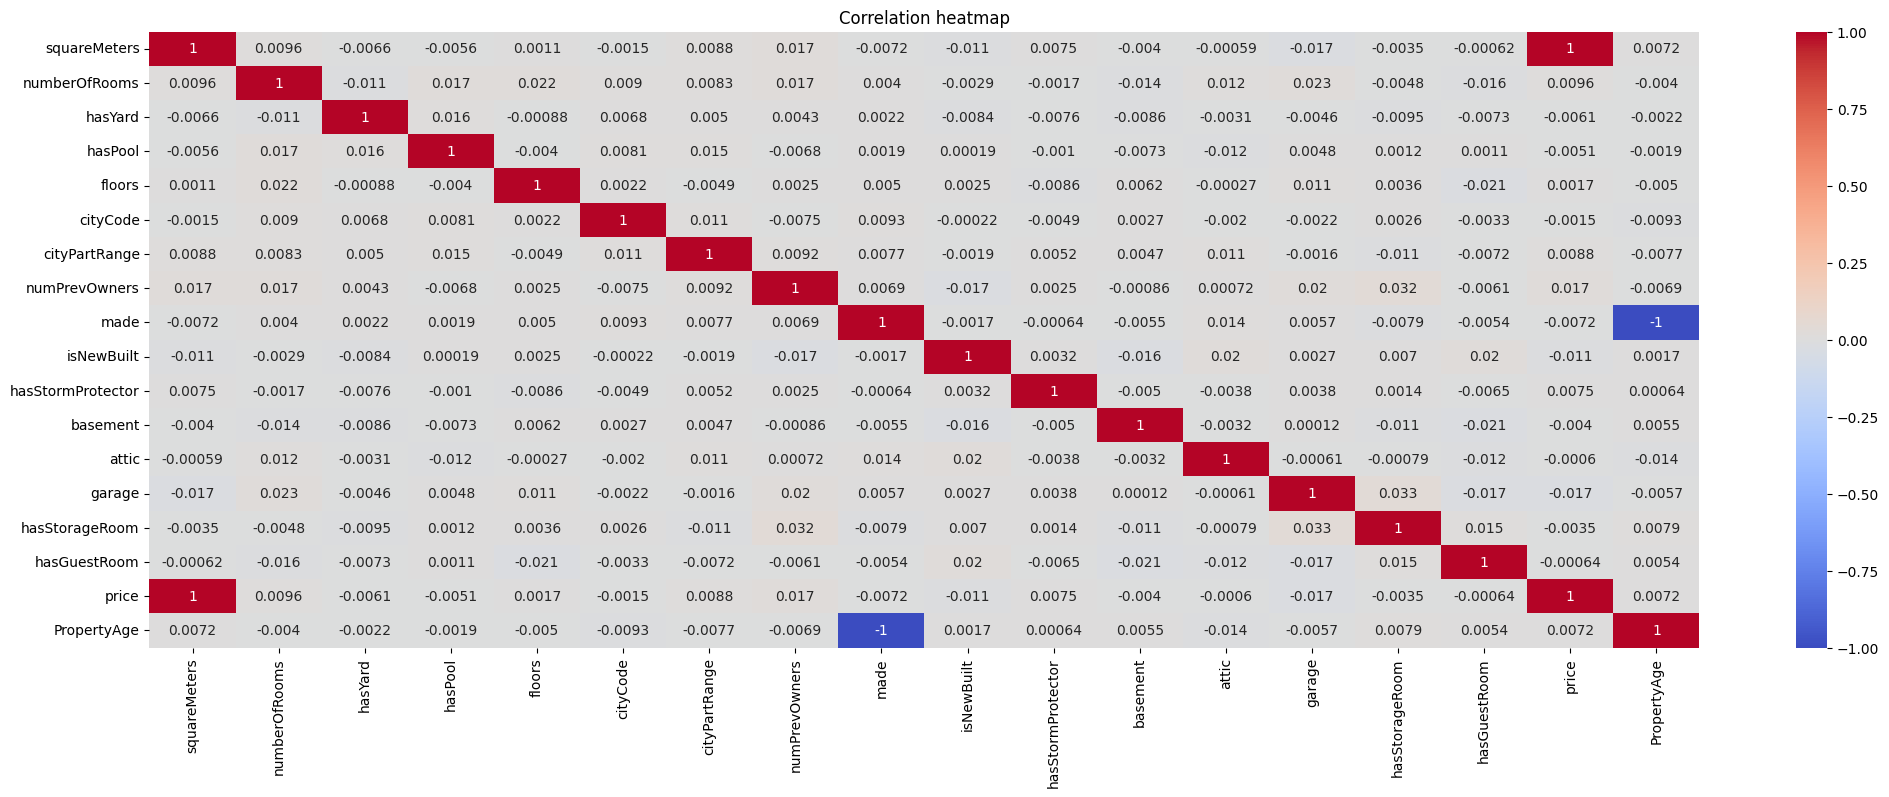

In [12]:
# Feature to target correlations
c=df.corr()
plt.figure(figsize=(25,8))
sns.heatmap(c,annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

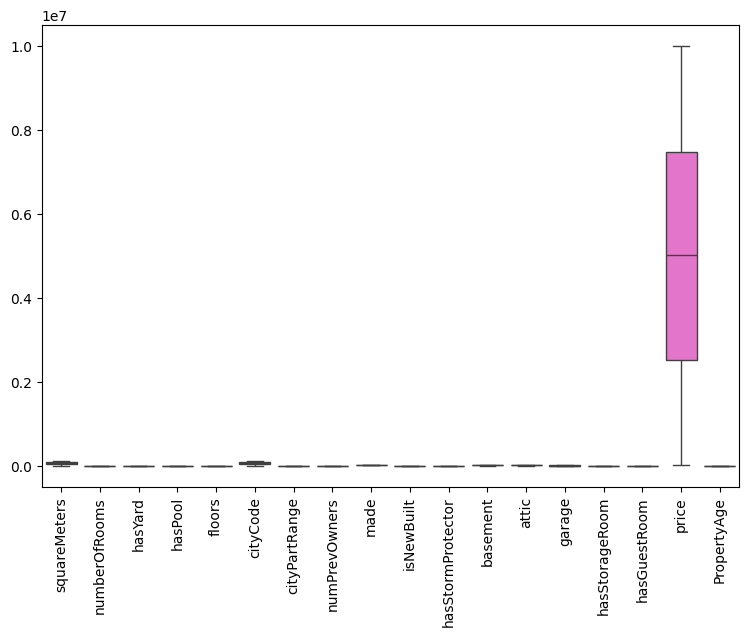

In [13]:
# Outliers
plt.figure(figsize=(9,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

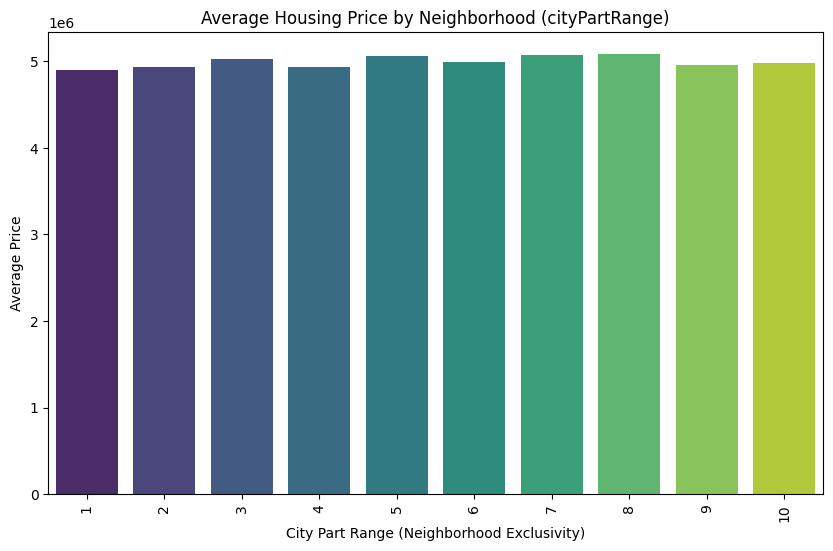

In [14]:
#Q2e
# Average price across city parts
price_by_citypart = df.groupby('cityPartRange')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='cityPartRange', y='price', data=price_by_citypart, palette='viridis')
plt.title("Average Housing Price by Neighborhood (cityPartRange)")
plt.xlabel("City Part Range (Neighborhood Exclusivity)")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()


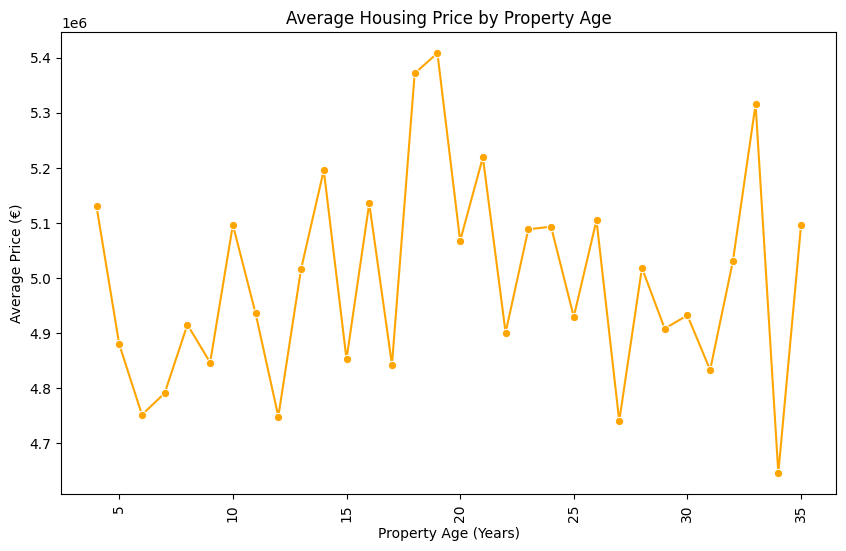

In [15]:
# Average price across property age (based on 'made')

price_by_age = df.groupby('PropertyAge')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='PropertyAge', y='price', data=price_by_age, marker='o', color='orange')
plt.title("Average Housing Price by Property Age")
plt.xlabel("Property Age (Years)")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=90)
plt.show()

In [16]:
#Q3 Model development

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

In [18]:
# Function to evaluate models
results = {}
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
    #print(f"Cross-Validation R² Mean: {cv_scores.mean():.4f}")
    results[name] = {"Cross-Validation R² Mean": cv_scores.mean(), "MAE": mae, "RMSE": rmse, "R²": r2}

In [19]:
# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

In [20]:
results_df= pd.DataFrame(results).T
results_df

,Cross-Validation R² Mean,MAE,RMSE,R²
Linear Regression,1.000000,1510.034181,1922.422545,1.000000
Ridge Regression,1.000000,1510.027700,1922.427213,1.000000
Lasso Regression,1.000000,1510.138117,1922.536132,1.000000
ElasticNet Regression,0.999999,1910.706410,2394.792849,0.999999
Random Forest Regressor,0.999998,3176.328970,3985.324465,0.999998
Gradient Boosting Regressor,0.999948,15281.903572,20169.668273,0.999954


We can see from the above table that Linear Regression is the best model

In [21]:
#Q4
# Train best model (Linear Regression)
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9999995780555567


In [22]:
# Feature Importance via Coefficients
coefficients = best_model.coef_
feature_names = df.drop('price', axis=1).columns

coef_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Importance': np.abs(coefficients)
}).sort_values(by='Absolute_Importance', ascending=False)

print("Linear Regression Feature Importance (Coefficients):")
print(coef_importance_df)

Linear Regression Feature Importance (Coefficients):
              Feature  Coefficient  Absolute_Importance
2             hasYard  2993.859264          2993.859264
3             hasPool  2993.106885          2993.106885
9          isNewBuilt   128.071127           128.071127
10  hasStormProtector   102.271312           102.271312
0        squareMeters   100.000082           100.000082
4              floors    54.465287            54.465287
6       cityPartRange    50.458555            50.458555
14     hasStorageRoom    41.623489            41.623489
15       hasGuestRoom    -6.327916             6.327916
7       numPrevOwners     2.821081             2.821081
16        PropertyAge     1.593730             1.593730
8                made    -1.593730             1.593730
1       numberOfRooms     0.273939             0.273939
13             garage     0.101285             0.101285
11           basement    -0.008188             0.008188
12              attic    -0.007582             0.00

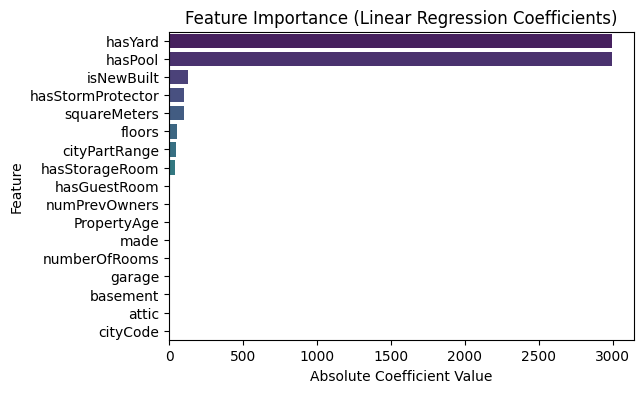

In [23]:
# Plot coefficients (absolute value)
plt.figure(figsize=(6,4))
sns.barplot(x='Absolute_Importance', y='Feature', data=coef_importance_df, palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [24]:
# SHAP Values for Interpretability
# SHAP expects original scaled data
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

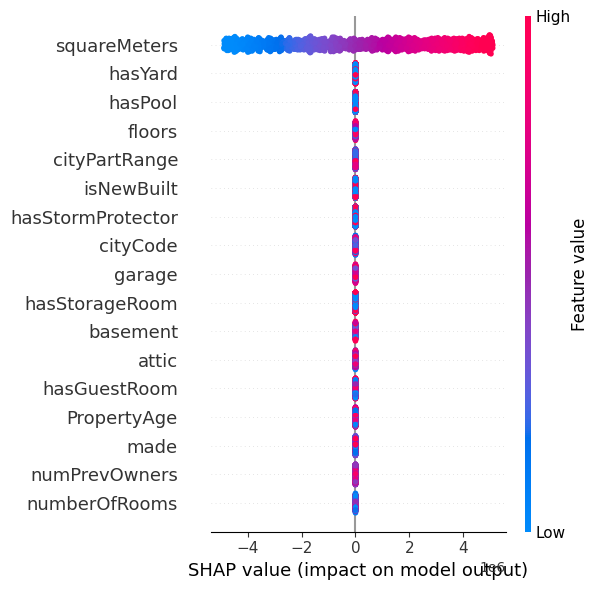

In [25]:
# Summary plot (beeswarm)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_size=(6,6))

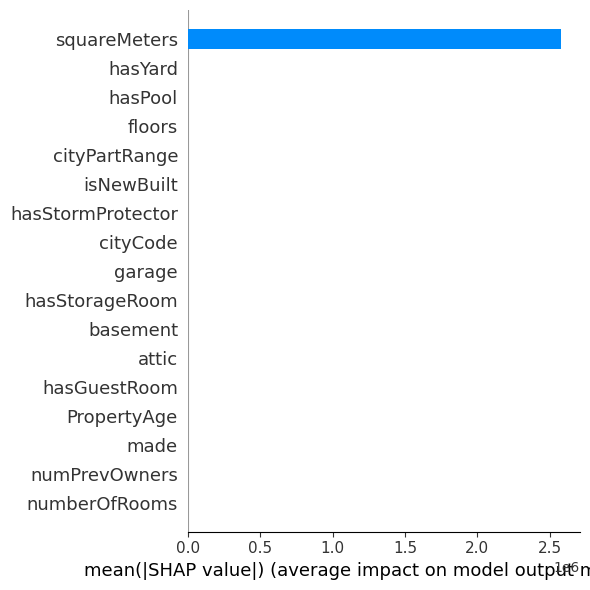

In [26]:
# Bar plot (average absolute SHAP value per feature)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", plot_size=(6,6))


In [27]:
# Prediction
input_data=(87678,  53  ,0  ,1, 57, 30308   ,3, 3   ,2015,0, 0, 1759,   1003,   850,    1,  7   ,31)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
pred = best_model.predict(input_data_reshaped)

In [28]:
#Q5
joblib.dump(best_model, "model.pkl")


['model.pkl']

In [29]:
# app.py streamlit code

# import streamlit as st
# import pandas as pd
# import joblib


# # Load model and scaler
# model = joblib.load('model.pkl')
# scaler = joblib.load('scaler.pkl')

# st.title("Paris Housing Price Prediction")

# # Feature columns (same as dataset features)
# features = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
#        'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
#        'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
#        'hasGuestRoom', 'PropertyAge']
# names = ['Square Meters', 'Number Of Rooms', 'Is there a Yard (0-no, 1-yes)', 'Is there a Pool (0-no, 1-yes)', 'Number of floors',
#        'City Code', 'City Part Range (0 (less exclusive)-10 (more exclusive)), ', 'Number of Prevous Owners', 'Built in (year)', 'Is Newly Built',
#        'Has a Storm Protector', 'Area of basement', 'Area of attic', 'Area of garage', 'Has Storage Room (0-no, 1-yes)','Number of Guest Rooms', 'Property Age (in Years)']


# user_data = []
# for feature in names:
#     value = st.number_input(f"Enter value for {feature}", step=1.0)
#     user_data.append(value)

# input_df = pd.DataFrame([user_data], columns=features)
    
# if st.button("Predict Price"):
#     # Predict
#     prediction = model.predict(input_df)[0]
#     df=input_df.values.tolist()
#     st.subheader(f"Predicted Price: €{prediction:,.2f}")



In [31]:
!streamlit run app.py

^C
